<a href="https://colab.research.google.com/github/hsu607/AI-Factory/blob/main/grid_search_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.metrics import f1_score

In [ ]:
# Seed 고정
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) 

In [ ]:
# data load
train_data = pd.read_csv("/content/drive/MyDrive/dacon/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/dacon/test.csv")

In [ ]:
train_data.head()

ID  danceability  energy  key  loudness  speechiness  \
0  TRAIN_00000        0.3341  0.9231   10    0.8540       0.3797   
1  TRAIN_00001        0.6344  0.5955   10    0.2826       0.1378   
2  TRAIN_00002        0.3983  0.1107    8    0.2459       0.0247   
3  TRAIN_00003        0.3139  0.9702    2    0.9252       0.9590   
4  TRAIN_00004        0.0735  0.9452    5    0.7702       0.1397   

   acousticness  instrumentalness  liveness  valence   tempo  duration  \
0        0.0080            0.0002    0.7697   0.7902  0.5391       175   
1        0.0000            0.7137    0.1597   0.4162  0.3043       513   
2        0.7740            0.0000    0.5105   0.4291  0.2324       151   
3        0.0371            0.3015    0.2539   0.0577  0.5406       246   
4        0.2583            0.0015    0.1774   0.1128  0.3176       229   

        genre  
0        trap  
1      techno  
2  Trap Metal  
3        trap  
4   Dark Trap

In [ ]:
test_data.head()

ID  danceability  energy  key  loudness  speechiness  acousticness  \
0  TEST_00000        0.8861  0.6821    2    0.7241       0.3103        0.1451   
1  TEST_00001        0.8495  0.3883    1    0.4495       0.4661        0.6234   
2  TEST_00002        0.2479  0.7549    3    0.7683       0.3131        0.5718   
3  TEST_00003        0.6344  0.9804    1    0.6599       0.0931        0.0020   
4  TEST_00004        0.6237  0.6926    6    0.6716       0.0269        0.0283   

   instrumentalness  liveness  valence   tempo  duration  
0            0.0000    0.5087   0.8863  0.9648       279  
1            0.0004    0.1347   0.4062  0.9051       151  
2            0.0000    0.1250   0.6357  0.3234       196  
3            0.6016    0.8799   0.8790  0.2946       207  
4            0.0001    0.1580   0.9288  0.3642       196

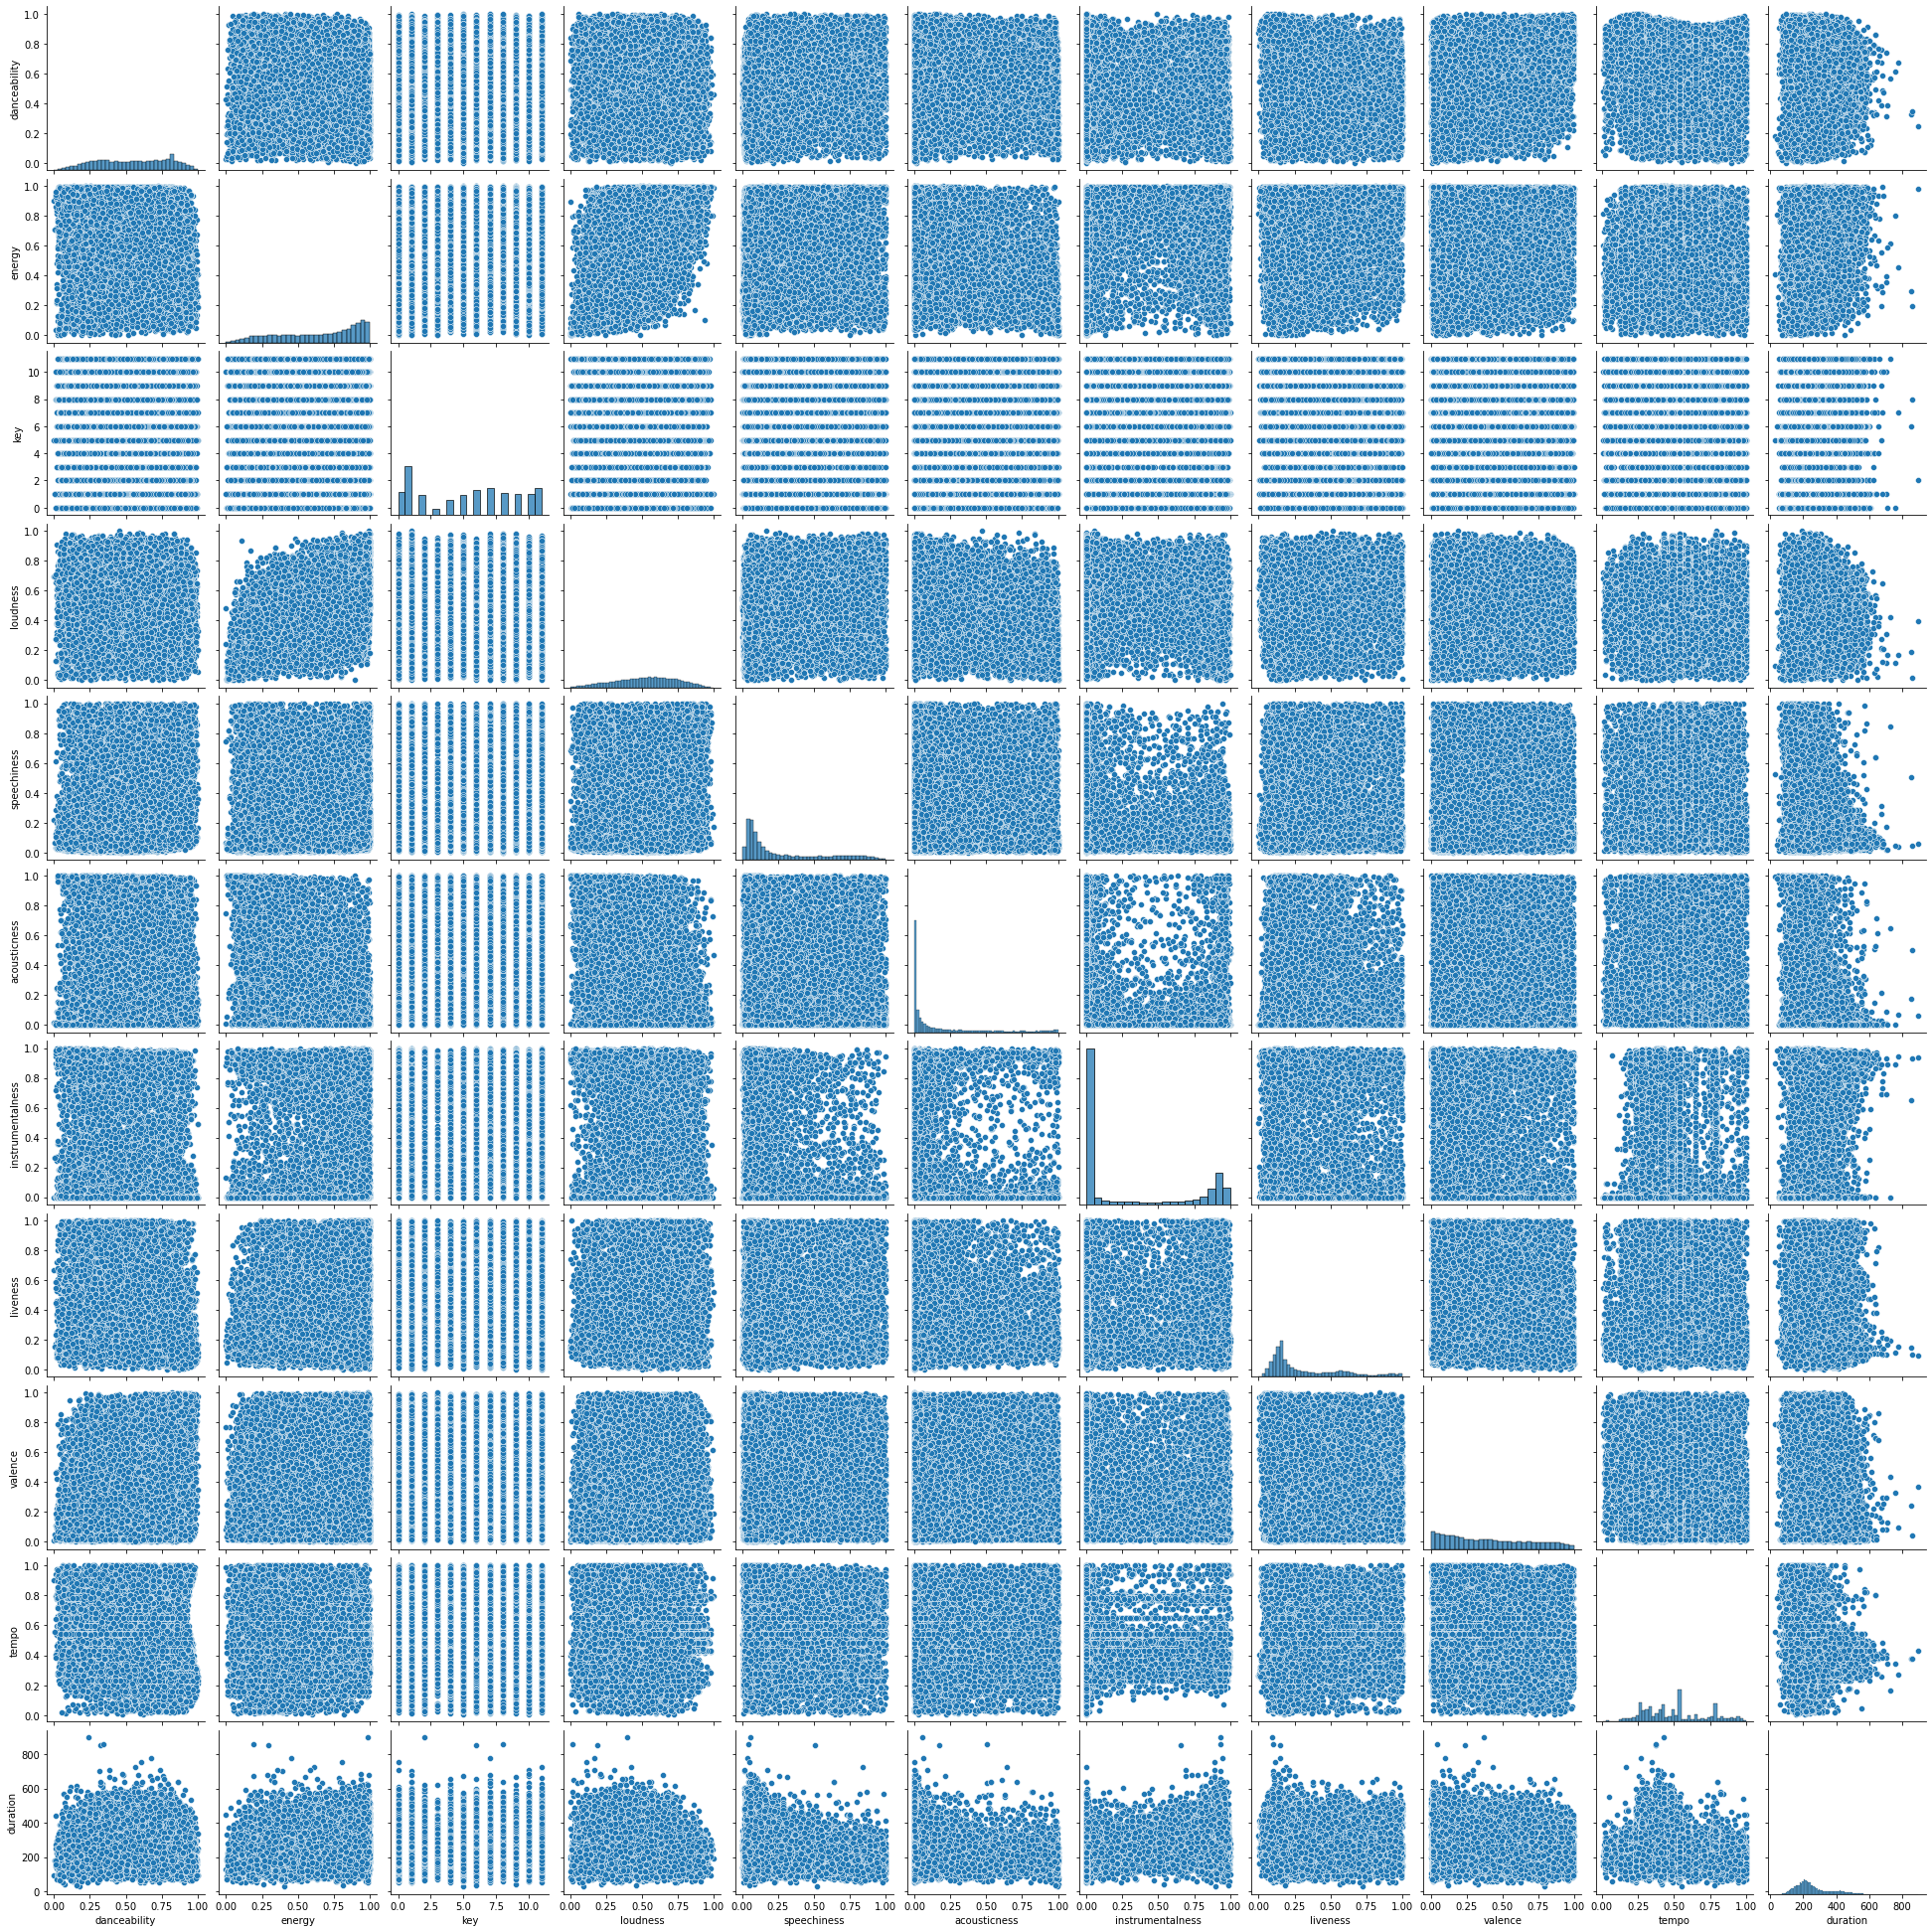

In [ ]:
# EDA
sns.pairplot(train_data)

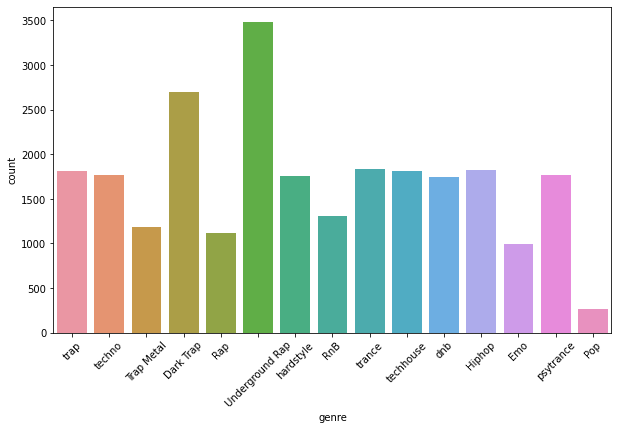

In [ ]:
# EDA
plt.figure(figsize = (10,6))
sns.countplot(x = train_data['genre'])
plt.xticks(rotation = 45)
plt.show()

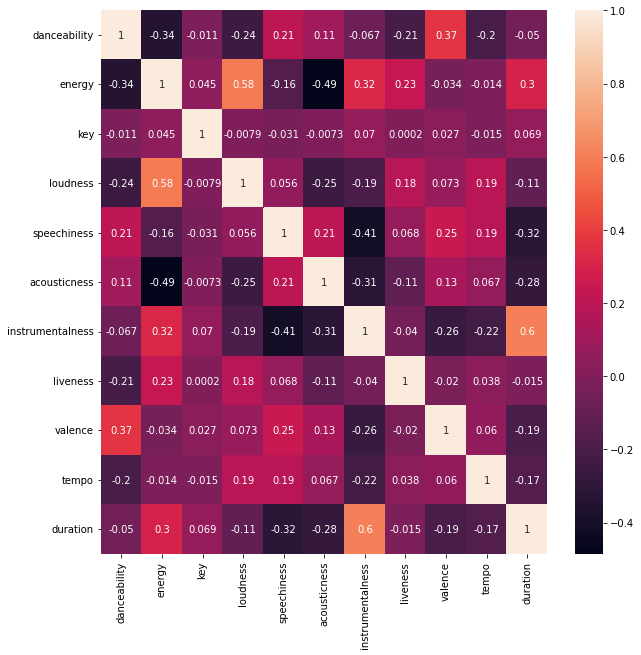

In [ ]:
# EDA
plt.figure(figsize = (10,10))
sns.heatmap(train_data.corr(), annot =True)

In [ ]:
# pd.get_dummies
# train_data = train_data.drop('ID', axis = 1)
# train_data = pd.get_dummies(train_data, columns = ['genre'])

In [ ]:
# 라벨 인코더
encoder = LabelEncoder()
encoder.fit(train_data['genre'])
train_data['genre'] = encoder.transform(train_data['genre'])

In [ ]:
# X,y 나누기
X = train_data.drop(['ID', 'genre'], axis = 1)  # 독립변수만 남기기
y = train_data[['genre']]  # 종속변수만 남기기
test = test_data.drop('ID', axis = 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)  # train, valid data 분리

In [ ]:
# Bagging
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
mybag = BaggingClassifier(DecisionTreeClassifier())
mybag.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
val_pred = mybag.predict(X_valid)
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.603569778337467입니다.


In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
mygbt = GradientBoostingClassifier(learning_rate = 0.01, n_estimators=60, subsample=1.0, min_samples_split=3,
                                   min_samples_leaf=4, min_weight_fraction_leaf=0.3, max_depth=10)
mygbt.fit(X_train, y_train)

val_pred = mygbt.predict(X_valid)
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


현재 Macro F1 Score의 검증 점수는 0.296187234372655입니다.


In [ ]:
# submission4   0.6492281033283802
rf = RandomForestClassifier(n_estimators = 700, max_depth = 40, min_samples_split = 6, min_samples_leaf = 4, 
                           class_weight ='balanced' ,n_jobs=-1, oob_score = True, random_state = 42)
rf.fit(X_train, y_train)

val_pred = rf.predict(X_valid)
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

<ipython-input-6-a772ed3b6132>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


현재 Macro F1 Score의 검증 점수는 0.6379250674830262입니다.


In [ ]:
# submission3
rf = RandomForestClassifier(n_estimators = 500, max_depth = 50, min_samples_split = 10, min_samples_leaf = 4,
                        n_jobs=-1, oob_score = True, random_state = 42)
rf.fit(X_train, y_train)

<ipython-input-111-4b2f3554c2c5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=50, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
val_pred = rf.predict(X_valid)
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(val_pred, y_valid, average = "macro")))

현재 Macro F1 Score의 검증 점수는 0.6492281033283802입니다.


In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(X_train, y_train)

XGBRFClassifier(objective='multi:softprob')

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create a search grid of parameters that will be shuffled through

param_grid = {

'bootstrap': [True],

'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],

'max_features': ['auto', 'sqrt'],

'min_samples_leaf': [1, 2, 4],

'min_samples_split': [2, 5, 10],

'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

}

# Using the random grid and searching for best hyperparameters

rf = RandomForestClassifier() #creating base model

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train) #fit is to initiate training process

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
pred = rf.predict(test)

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/dacon/sample_submission.csv")
submission["genre"] = pred

In [ ]:
submission

ID            genre
0      TEST_00000           Hiphop
1      TEST_00001        Dark Trap
2      TEST_00002              Emo
3      TEST_00003        techhouse
4      TEST_00004              Pop
...           ...              ...
16917  TEST_16917        techhouse
16918  TEST_16918           Hiphop
16919  TEST_16919        hardstyle
16920  TEST_16920        psytrance
16921  TEST_16921  Underground Rap

[16922 rows x 2 columns]

In [ ]:
submission.to_csv("./submit4.csv", index = False)

필요없는거...매트릭스 

In [ ]:
import sympy
x = sympy.symbols("x")
f = sympy.Eq(1 - 0.2 * x - 0.4 * x**2, 0)
sympy.solve(f)[0]**-1
sympy.solve(f)[1]**-1

0.740312423743285

In [ ]:
0.698**-1

1.4326647564469914

In [ ]:
import sympy
x = sympy.symbols("x")
f = sympy.Eq(1 + 0.2 * x + 0.48 * x**2, 0)
sympy.solve(f)

[-0.208333333333333 - 1.42826137508355*I,
 -0.208333333333333 + 1.42826137508355*I]

In [ ]:
0.48*1.42826

0.6855648

In [ ]:
print(sympy.solve(f)[0]**-1, sympy.solve(f)[1]**-1)

0.48*(-0.208333333333333 + 1.42826137508355*I) 0.48*(-0.208333333333333 - 1.42826137508355*I)


In [ ]:
print(abs(sympy.solve(f)[0]), abs(sympy.solve(f)[1]))

1.44337567297406 1.44337567297406


In [ ]:
1/(1-0.2-0.48)

3.1249999999999996

In [ ]:
import numpy as np

eig = np.linalg.eig
testmatrix = np.matrix([[4, 0, 0],[0,9,0], [0,0, 1]]) # 매트릭스 생성

print(eig(testmatrix))
print(np.linalg.inv(testmatrix))
print(eig(np.linalg.inv(testmatrix)))

(array([4., 9., 1.]), matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))
[[0.25       0.         0.        ]
 [0.         0.11111111 0.        ]
 [0.         0.         1.        ]]
(array([0.25      , 0.11111111, 1.        ]), matrix([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]))


In [ ]:
import numpy as np

eig = np.linalg.eig
testmatrix = np.matrix([[1, 2], [2, -2]]) # 매트릭스 생성

print(eig(testmatrix))
print(np.linalg.det(testmatrix))

(array([ 2., -3.]), matrix([[ 0.89442719, -0.4472136 ],
        [ 0.4472136 ,  0.89442719]]))
-6.0


In [ ]:
A_inv = np.linalg.inv(testmatrix)
print(A_inv)
print(eig(A_inv))

[[ 0.33333333  0.33333333]
 [ 0.33333333 -0.16666667]]
(array([ 0.5       , -0.33333333]), matrix([[ 0.89442719, -0.4472136 ],
        [ 0.4472136 ,  0.89442719]]))
